## **Extracting OSM Data**

Projected grid: *British National Grid epsg:27700*
+ trees
+ memorials

In [15]:
%pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [42]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [43]:
import os

os.chdir('c:/Users/chalm/Documents/Sem 2/Computational Intelligence/datasets')

In [44]:
# select location
place_name = "cambridge"

### **2. Get Memorials**

In [45]:
tags = {"historic": "memorial"}
memorials = ox.features_from_place(place_name, tags=tags)

memorials = memorials.to_crs(epsg=27700)

In [46]:
memorials["geometry"] = memorials.geometry.centroid

memorials["Easting"] = memorials.geometry.x
memorials["Northing"] = memorials.geometry.y

memorials_clean = memorials[["Easting", "Northing"]]
memorials_clean.head()
memorials_clean.to_csv(f"{place_name}_memorials.csv", index=False)

In [47]:
memorials_clean.head()

Easting       Northing
element id                                     
node    20922112   544793.274285  258262.288496
        298290470  546598.566101  259034.603440
        298888663  545749.315274  257342.985915
        299607154  545233.785684  259458.365577
        370165819  544555.437567  255122.598271

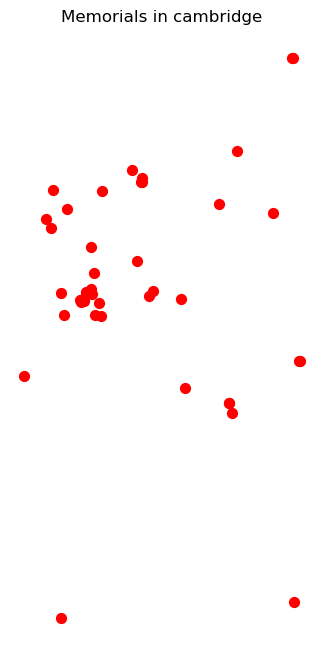

In [48]:
from shapely.geometry import Point

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(memorials_clean["Easting"], memorials_clean["Northing"])]
memorials_gdf = gpd.GeoDataFrame(memorials_clean, geometry=geometry, crs="EPSG:27700")

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
memorials_gdf.plot(ax=ax, color='red', markersize=50)

ax.set_title(f"Memorials in {place_name}")
ax.set_axis_off()
plt.show()

### **3. Get trees**

In [49]:
tags = {"natural": "tree"}

# Step 2: Retrieve tree data (point features only)
trees = ox.features_from_place(place_name, tags)

trees = trees.to_crs(epsg=27700)

In [50]:
trees["geometry"] = trees.geometry.centroid

trees["Easting"] = trees.geometry.x
trees["Northing"] = trees.geometry.y
gdf_trees_clean = trees[["Easting", "Northing"]]
gdf_trees_clean.to_csv(f"{place_name}_trees.csv", index=False)

In [51]:
gdf_trees_clean.head()

Easting       Northing
element id                                     
node    287490391  544586.247669  258274.632982
        287490542  544592.502408  258248.936829
        289809096  544429.767423  258612.235799
        289809100  544523.841776  258605.172116
        442330206  543793.801046  258936.552262

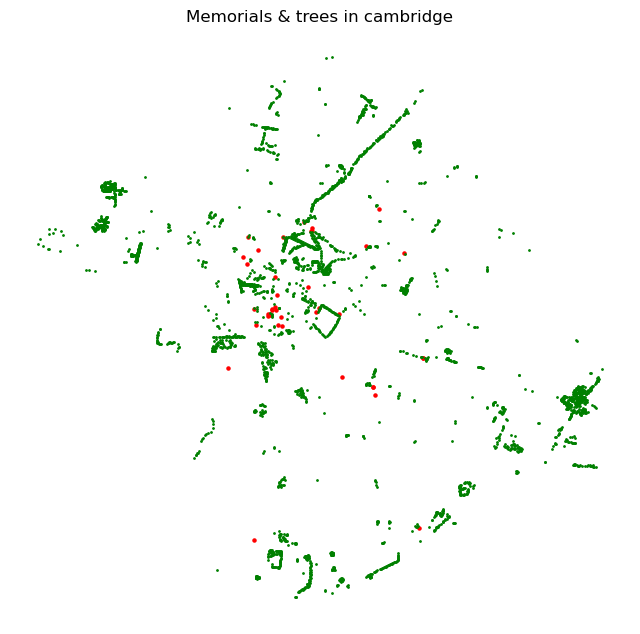

In [52]:
from shapely.geometry import Point

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(gdf_trees_clean["Easting"], gdf_trees_clean["Northing"])]
trees_gdf = gpd.GeoDataFrame(gdf_trees_clean, geometry=geometry, crs="EPSG:27700")

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
memorials_gdf.plot(ax=ax, color='red', markersize=5)
trees_gdf.plot(ax=ax, color='green', markersize=1)

ax.set_title(f"Memorials & trees in {place_name}")
ax.set_axis_off()
plt.show()

### **3. Check Road Network**
(optional, checking if got correct area)

In [53]:
# # Get road network for the specified place
# road_network = ox.graph_from_place(place_name, network_type='all')


In [54]:
# fig, ax = plt.subplots(figsize=(10, 10))

# road_network_proj = ox.project_graph(road_network)
# # plot the road network
# ox.plot_graph(road_network_proj, ax=ax, node_size=0, edge_color='black', edge_linewidth=0.3)
# # add title and remove axis
# ax.set_title(f"Road Network of {place_name}", fontsize=15)
# ax.axis('off')